In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df=pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
test_df=pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

In [4]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
print(train_df.shape,test_df.shape)

(20758, 18) (13840, 17)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [7]:
train_df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
train_df.nunique()

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

In [9]:
train_df.Age.unique()

array([24.443011, 18.      , 20.952737, ..., 25.746113, 38.08886 ,
       33.852953])

In [10]:
cat_columns=[col for col in train_df.columns if train_df[col].dtype=="object"]
num_columns=[col for col in train_df.columns if train_df[col].dtype!="object"]

In [11]:
print(cat_columns,num_columns)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'] ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [12]:
train_df.Age.value_counts()

Age
18.000000    1916
26.000000    1806
21.000000    1643
23.000000    1202
19.000000     886
             ... 
23.462915       1
18.065817       1
21.945380       1
16.120699       1
33.852953       1
Name: count, Length: 1703, dtype: int64

In [13]:
train_df.Age=train_df.Age.apply(lambda x: round(x,1))

In [14]:
cat_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [15]:
df=train_df.copy()

In [16]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.4,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.0,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.0,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,21.0,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.6,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
df.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [18]:
df.NObeyesdad=df.NObeyesdad.map({"Obesity_Type_III":3,
"Obesity_Type_II":2,
"Normal_Weight":4,
"Obesity_Type_I":1,
"Insufficient_Weight":0,
"Overweight_Level_II":6,
"Overweight_Level_I":5})

In [19]:
df=pd.get_dummies(columns=['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS'],data=df,drop_first=True,dtype="int")

In [20]:
df.head()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,...,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,24.4,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,6,...,1,0,0,0,1,0,0,0,1,0
1,1,18.0,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,4,...,0,0,0,0,0,1,0,0,0,0
2,2,18.0,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,...,1,0,0,0,0,1,0,0,1,0
3,3,21.0,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,3,...,1,0,0,0,1,0,0,0,1,0
4,4,31.6,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,6,...,1,0,0,0,1,0,0,0,1,0


In [21]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,...,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,...,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.842249,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756,2.945322,...,0.844446,0.013441,0.011803,0.033096,0.725792,0.248723,0.001542,0.001831,0.803883,0.022497
std,5992.46278,5.687914,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113,1.875605,...,0.362441,0.115155,0.108000,0.178891,0.446125,0.432284,0.039234,0.042748,0.397068,0.148298
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,10378.50000,22.800000,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887,3.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cat_columns

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Overweight_Level_II'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Insufficient_Weight'),
  Text(3, 0, 'Obesity_Type_III'),
  Text(4, 0, 'Obesity_Type_II'),
  Text(5, 0, 'Overweight_Level_I'),
  Text(6, 0, 'Obesity_Type_I')])

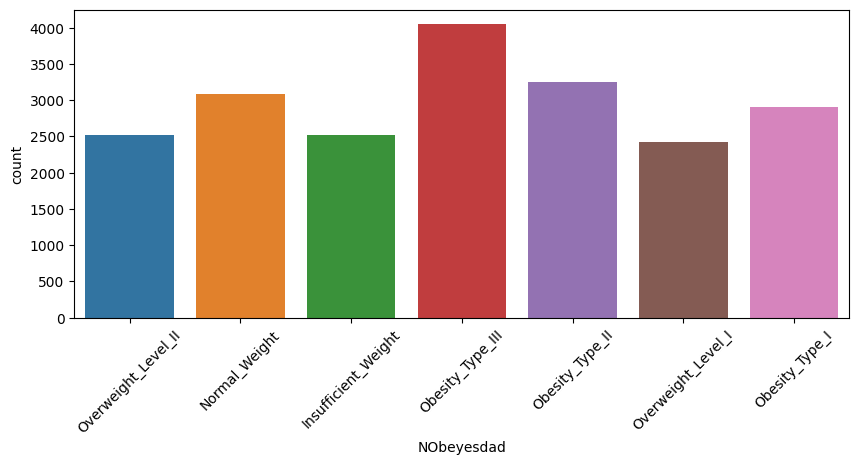

In [108]:
plt.figure(figsize=(10,4))
sns.countplot(x=train_df.NObeyesdad,data=train_df)
plt.xticks(rotation=45)

<Axes: xlabel='Gender', ylabel='count'>

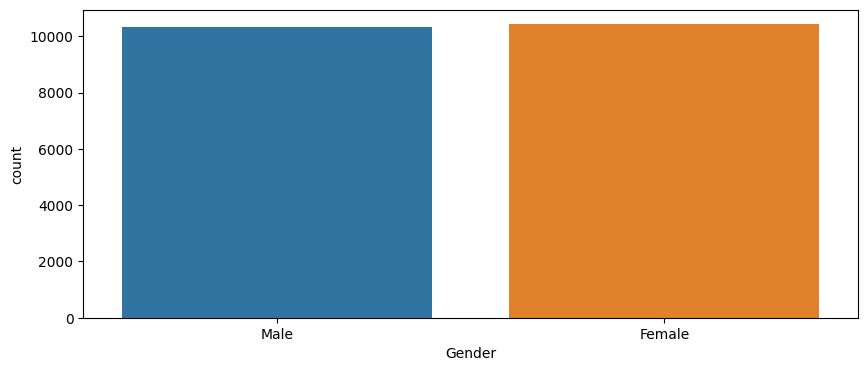

In [109]:
plt.figure(figsize=(10,4))
sns.countplot(x=train_df.Gender,data=train_df)

<Axes: xlabel='SCC', ylabel='count'>

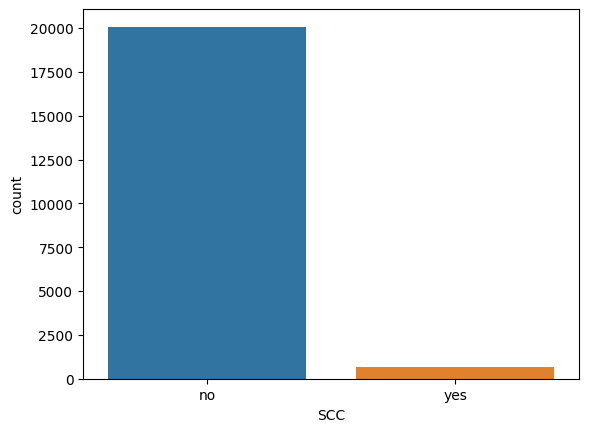

In [111]:
sns.countplot(x=train_df.SCC,data=df)

<Axes: xlabel='SMOKE', ylabel='count'>

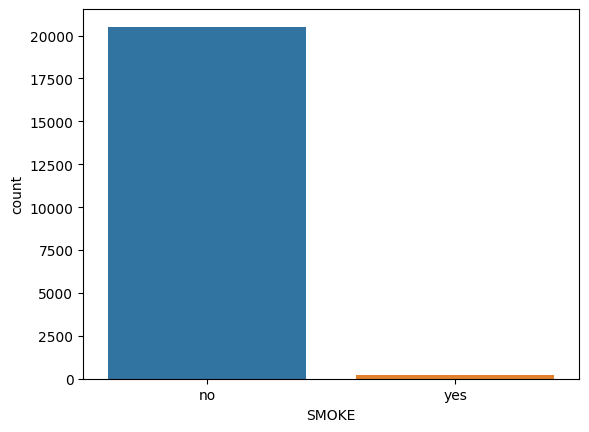

In [114]:
sns.countplot(x=train_df.SMOKE,data=df)

<Axes: xlabel='family_history_with_overweight', ylabel='count'>

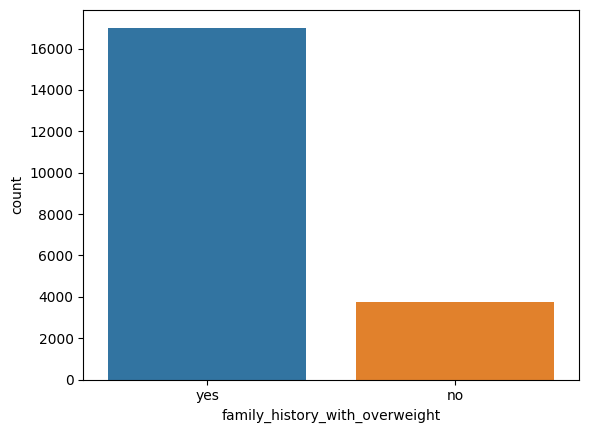

In [115]:
sns.countplot(x=train_df.family_history_with_overweight,data=df)

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ]),
 [Text(0.0, 0, '0.00'),
  Text(0.25, 0, '0.25'),
  Text(0.5, 0, '0.50'),
  Text(0.75, 0, '0.75'),
  Text(1.0, 0, '1.00'),
  Text(1.25, 0, '1.25'),
  Text(1.5, 0, '1.50'),
  Text(1.75, 0, '1.75'),
  Text(2.0, 0, '2.00')])

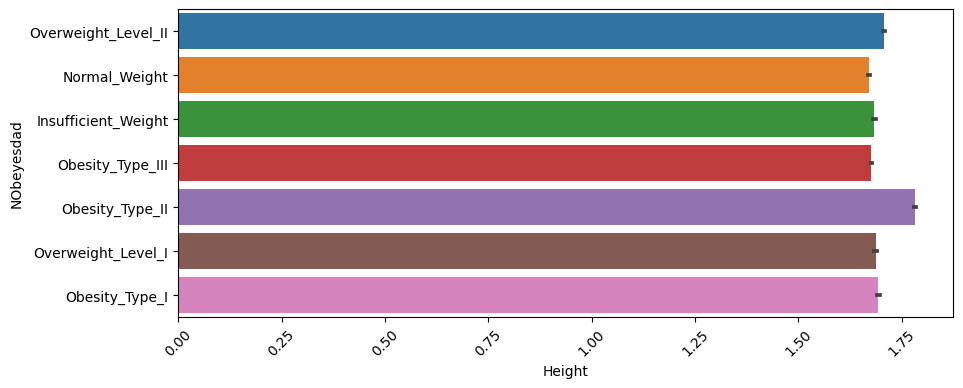

In [123]:
plt.figure(figsize=(10,4))
sns.barplot(y=train_df.NObeyesdad,x=train_df.Height)
plt.xticks(rotation=45)

<Axes: xlabel='Age', ylabel='NObeyesdad'>

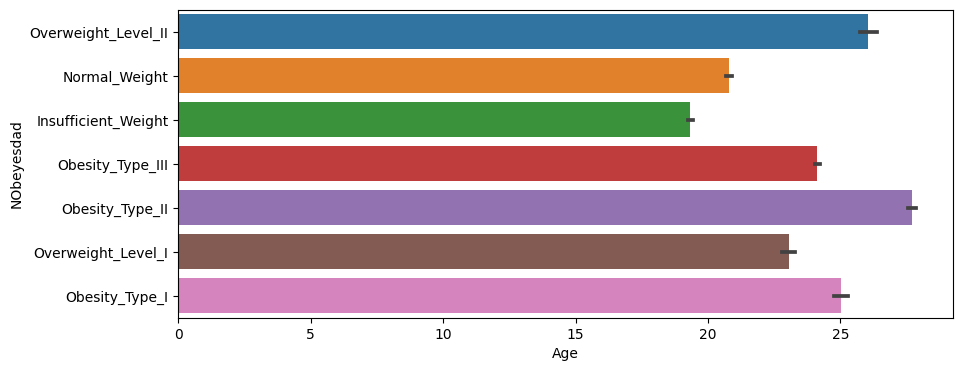

In [122]:
plt.figure(figsize=(10,4))
sns.barplot(y=train_df.NObeyesdad,x=train_df.Age)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Count'>

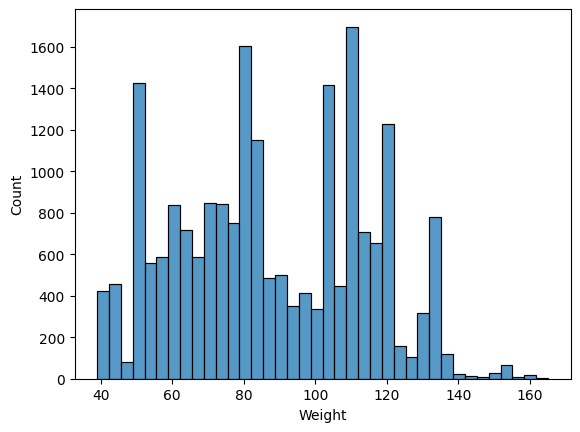

In [124]:
sns.histplot(train_df.Weight)

In [ ]:
sns.displot(train_df)

In [22]:
df.dtypes

id                                      int64
Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
NObeyesdad                              int64
Gender_Male                             int64
family_history_with_overweight_yes      int64
FAVC_yes                                int64
CAEC_Frequently                         int64
CAEC_Sometimes                          int64
CAEC_no                                 int64
SMOKE_yes                               int64
SCC_yes                                 int64
CALC_Sometimes                          int64
CALC_no                                 int64
MTRANS_Bike                             int64
MTRANS_Motorbike                  

In [23]:
X=df.drop(["id","NObeyesdad"],axis=1)
y=df.NObeyesdad

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
X_train

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
9958,17.0,1.770000,97.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1,1,...,0,0,0,0,0,1,0,0,0,0
7841,22.7,1.753389,54.877111,2.000000,4.000000,2.000000,2.000000,1.000000,1,1,...,1,0,0,0,0,1,0,0,1,0
9293,21.8,1.819867,122.024954,3.000000,2.880817,1.645338,0.739881,0.000000,1,1,...,1,0,0,0,1,0,0,0,1,0
15209,41.0,1.580000,80.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0,1,...,1,0,0,0,1,0,0,0,0,0
16515,23.0,1.800000,95.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,18.0,1.722461,80.442775,2.628791,2.562895,1.844645,0.288032,0.722276,0,1,...,1,0,0,0,0,1,0,0,1,0
11964,22.0,1.750000,95.000000,3.000000,3.000000,2.000000,3.000000,0.000000,1,1,...,1,0,0,0,1,0,0,0,1,0
5390,21.0,1.620000,68.000000,2.000000,3.000000,3.000000,2.000000,0.000000,1,0,...,0,0,0,0,1,0,0,0,1,0
860,26.0,1.650125,111.939671,3.000000,3.000000,2.770732,0.000000,0.237307,0,1,...,1,0,0,0,1,0,0,0,1,0


In [26]:
y_train

9958     1
7841     0
9293     2
15209    1
16515    6
        ..
11284    5
11964    6
5390     5
860      3
15795    1
Name: NObeyesdad, Length: 16606, dtype: int64

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [38]:
def prediction(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("accuracy_score : ", accuracy_score(y_test,y_pred))
    #print("precision_score : ", precision_score(y_test,y_pred))
    #print("recall_score : ", recall_score(y_test,y_pred))
    #print("f1_score : ", f1_score(y_test,y_pred))
    print("confusion_matrix \n ", confusion_matrix(y_test,y_pred))
    print("classification_report \n ",classification_report(y_test,y_pred))


In [39]:
tree_model=DecisionTreeClassifier(random_state=42)
prediction(tree_model)

accuracy_score :  0.845616570327553
confusion_matrix 
  [[462   1   0   0  55   5   1]
 [  1 439  22   3   1  26  51]
 [  0  24 625   3   0   0   5]
 [  0   2   1 801   0   0   0]
 [ 47   1   0   0 492  73  13]
 [  2  15   0   2  55 327  83]
 [  0  52   7   1  13  76 365]]
classification_report 
                precision    recall  f1-score   support

           0       0.90      0.88      0.89       524
           1       0.82      0.81      0.82       543
           2       0.95      0.95      0.95       657
           3       0.99      1.00      0.99       804
           4       0.80      0.79      0.79       626
           5       0.64      0.68      0.66       484
           6       0.70      0.71      0.71       514

    accuracy                           0.85      4152
   macro avg       0.83      0.83      0.83      4152
weighted avg       0.85      0.85      0.85      4152



In [40]:
random_model=RandomForestClassifier(n_estimators=500,criterion="gini",random_state=42)
prediction(random_model)

accuracy_score :  0.8913776493256262
confusion_matrix 
  [[477   0   0   0  44   2   1]
 [  2 466  13   1   2  18  41]
 [  0  13 642   0   0   0   2]
 [  0   0   1 802   0   1   0]
 [ 28   0   0   0 556  34   8]
 [  1   7   0   0  60 346  70]
 [  0  35   4   0  15  48 412]]
classification_report 
                precision    recall  f1-score   support

           0       0.94      0.91      0.92       524
           1       0.89      0.86      0.88       543
           2       0.97      0.98      0.97       657
           3       1.00      1.00      1.00       804
           4       0.82      0.89      0.85       626
           5       0.77      0.71      0.74       484
           6       0.77      0.80      0.79       514

    accuracy                           0.89      4152
   macro avg       0.88      0.88      0.88      4152
weighted avg       0.89      0.89      0.89      4152



In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
model=RandomForestClassifier(random_state=42)

In [71]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1000,num=10)]
max_features=["sqrt","log2"]
max_depth=[int(x) for x in np.linspace(6,30,num=6)]
min_sample_split=[2,5,10,15,100]
min_sample_leaf=[1,2,5,10]

In [75]:
param_dist={"n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_sample_split,
            "min_samples_leaf":min_sample_leaf}

In [76]:
#random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)
#random_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [6, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='accuracy')

In [77]:
#best_model = random_search.best_estimator_

In [82]:
#sample_prediction=best_model.predict(X_test)
#accuracy=accuracy_score(y_test,sample_prediction)
#confusion=confusion_matrix(y_test,sample_prediction)
#print(accuracy,classification_report,confusion)

0.8911368015414258               precision    recall  f1-score   support

           0       0.94      0.91      0.92       524
           1       0.90      0.86      0.88       543
           2       0.98      0.98      0.98       657
           3       1.00      1.00      1.00       804
           4       0.82      0.89      0.85       626
           5       0.77      0.72      0.74       484
           6       0.77      0.80      0.79       514

    accuracy                           0.89      4152
   macro avg       0.88      0.88      0.88      4152
weighted avg       0.89      0.89      0.89      4152
 [[475   0   0   0  46   2   1]
 [  2 466  12   1   2  18  42]
 [  0  13 641   0   0   0   3]
 [  0   0   1 802   0   1   0]
 [ 27   0   0   0 555  36   8]
 [  1   7   0   0  60 349  67]
 [  0  34   3   0  16  49 412]]


In [42]:
final_model=random_model.fit(X_train,y_train)

In [43]:
test_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [44]:
test_df.Age=test_df.Age.apply(lambda x: round(x,1))

In [45]:
test_df=pd.get_dummies(columns=['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS'],data=test_df,drop_first=True,dtype="int")

In [46]:
id=test_df.id

In [51]:
test_data=test_df.drop(["id",'CALC_Frequently'],axis=1)

In [53]:
test_data.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [54]:
test_prediction=final_model.predict(test_data)

In [ ]:
#new_prediction=best_model.predict(test_data)

In [55]:
output=pd.DataFrame({"id":id,"NObeyesdad":test_prediction})

In [57]:
output.NObeyesdad=output.NObeyesdad.map({3:"Obesity_Type_III",
2:"Obesity_Type_II",
4:"Normal_Weight",
1:"Obesity_Type_I",
0:"Insufficient_Weight",
6:"Overweight_Level_II",
5:"Overweight_Level_I"})

In [60]:
output.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [59]:
output.to_csv("/kaggle/working/sample_submission.csv",index=False)

In [85]:
#import xgboost as xgb
#xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
#xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [88]:
#sample_prediction=xgb_model.predict(X_test)
#accuracy=accuracy_score(y_test,sample_prediction)
#accuracy

0.9022157996146436

In [91]:
#from scipy.stats import randint, uniform
'''param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'min_child_weight': randint(1, 10)
}
'''

In [93]:
#random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)
#random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cbdec61c370>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cbdec61de40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cbde9f1c0a0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cbdec61e530>},
                   random_state=42, scoring='accuracy')

In [94]:
# Best model
#best_model = random_search.best_estimator_
#xgb_prediction=best_model.predict(X_test)
#print("accuracy : ",accuracy_score(y_test,xgb_prediction))

accuracy :  0.9077552986512524


In [95]:
#xgb_pred=best_model.predict(test_data)

In [96]:
#output=pd.DataFrame({"id":id,"NObeyesdad":xgb_pred})

In [97]:
#output

,id,NObeyesdad
0,20758,2
1,20759,5
2,20760,3
3,20761,1
4,20762,3
...,...,...
13835,34593,6
13836,34594,5
13837,34595,0
13838,34596,4


In [98]:
#output.NObeyesdad=output.NObeyesdad.map({3:"Obesity_Type_III",
2:"Obesity_Type_II",
4:"Normal_Weight",
1:"Obesity_Type_I",
0:"Insufficient_Weight",
6:"Overweight_Level_II",
5:"Overweight_Level_I"})

In [100]:
#output.to_csv("/kaggle/working/sample_submission1.csv",index=False)